# Data Science Intern @Lets Grow More

# Author - Iqra Ayaz

# Task 1 : Iris Flower Classification ML Project       


In [39]:
import pandas as pd
import numpy as np
import scipy.stats as st
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import svm
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [41]:
df.shape

(150, 6)

In [42]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [43]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
44,45,5.1,3.8,1.9,0.4,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
18,19,5.7,3.8,1.7,0.3,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
105,106,7.6,3.0,6.6,2.1,Iris-virginica


In [44]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [45]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [46]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [47]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [48]:
df = df.drop(columns = ['Id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [50]:
df = df.rename(columns = {'SepalLengthCm': 'sepal_length', 'PetalLengthCm': 'petal_length', 'SepalWidthCm': 'sepal_width' , 'PetalWidthCm': 'petal_width' })
print(df)

     sepal_length  sepal_width  petal_length  petal_width         Species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


### Data Visualization

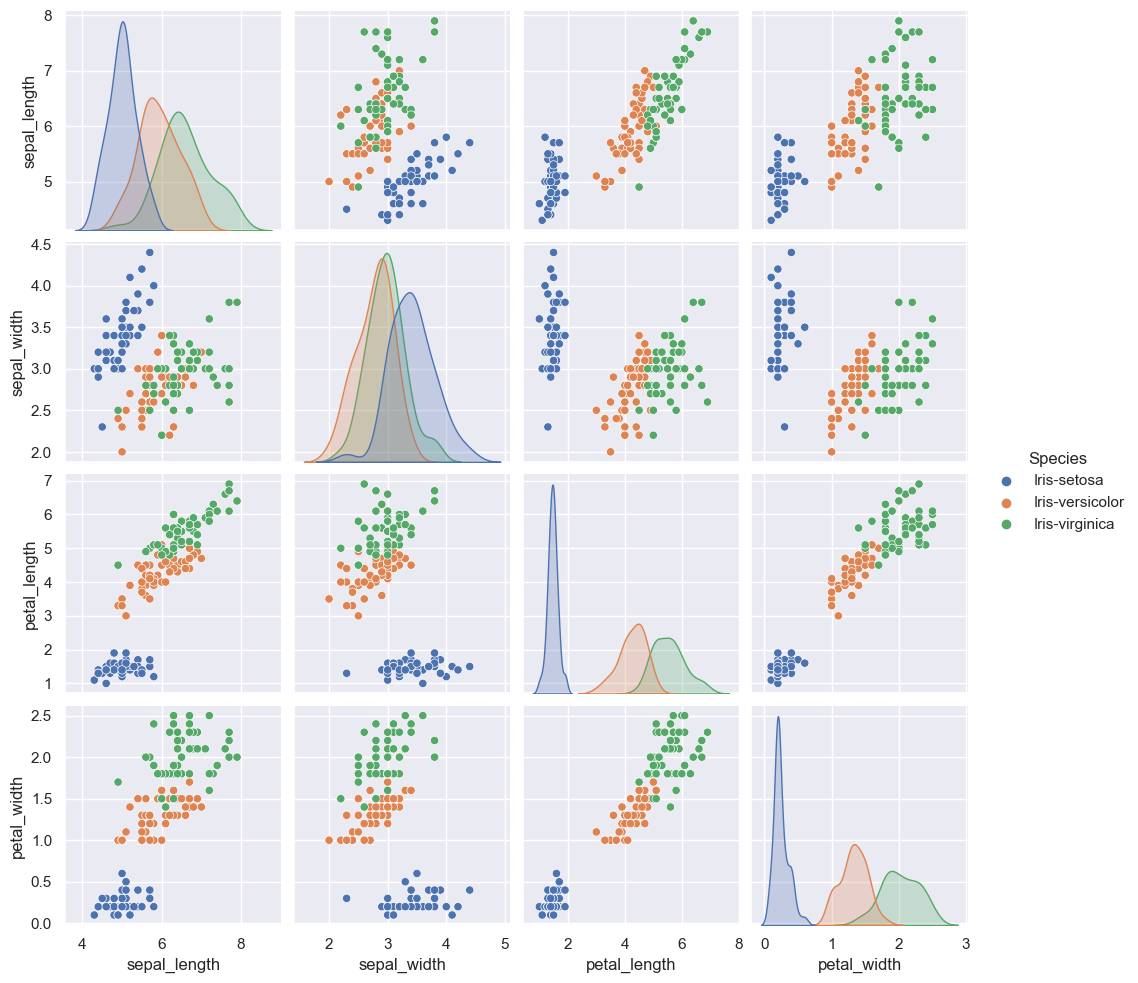

In [51]:
sns.pairplot(df, hue = "Species")
plt.show()

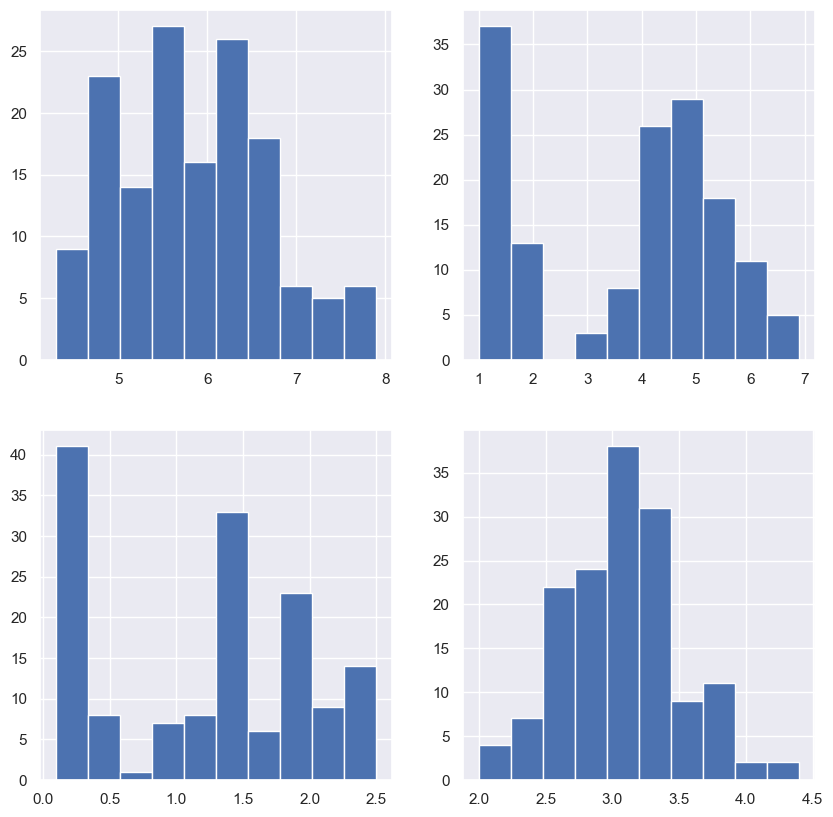

In [52]:
def histplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    df['sepal_length'].hist(ax=axes[0][0])
    df['petal_length'].hist(ax=axes[0][1])
    df['petal_width'].hist(ax=axes[1][0])
    df['sepal_width'].hist(ax=axes[1][1])
    plt.show()
    
histplots()

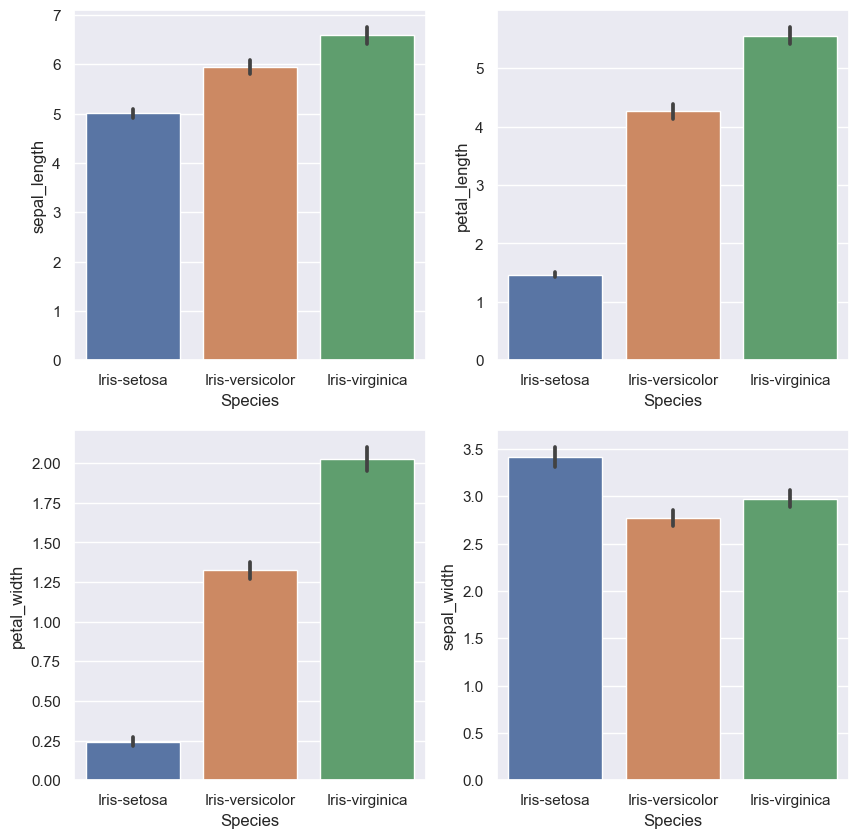

In [53]:
def barplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    sns.barplot(x=df.Species,y=df['sepal_length'],ax=axes[0][0])
    sns.barplot(x=df.Species,y=df['petal_length'],ax=axes[0][1])
    sns.barplot(x=df.Species,y=df['petal_width'],ax=axes[1][0])
    sns.barplot(x=df.Species,y=df['sepal_width'],ax=axes[1][1])
    plt.show()
    
barplots()

### --- Correlation  

In [54]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot: >

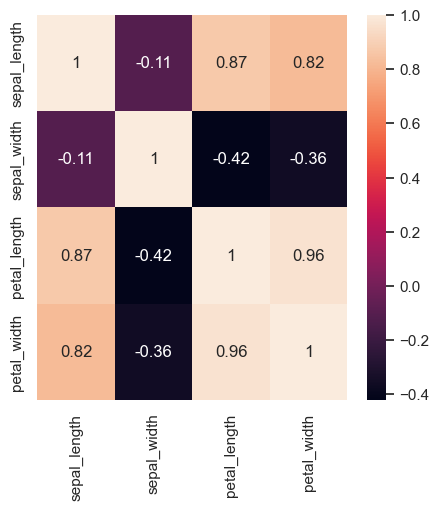

In [55]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax)

### Model training 

In [56]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,Species
125,7.2,3.2,6.0,1.8,2
38,4.4,3.0,1.3,0.2,0
124,6.7,3.3,5.7,2.1,2
12,4.8,3.0,1.4,0.1,0
78,6.0,2.9,4.5,1.5,1
108,6.7,2.5,5.8,1.8,2
134,6.1,2.6,5.6,1.4,2
54,6.5,2.8,4.6,1.5,1
95,5.7,3.0,4.2,1.2,1
113,5.7,2.5,5.0,2.0,2


In [57]:
x = df.iloc[:,:4].values
y = df.iloc[:,4].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### ML algorithms

In [58]:
#LINEAR REGRESSION 

model = LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

sc_lr = round(model.score(x_test, y_test) * 100 , 2)

print("Accuracy: ", str(sc_lr) , " %" )


Accuracy:  91.9  %


In [59]:
#LOGISTIC REGRESSION 

model2 = LogisticRegression()

model2.fit(x_train,y_train)

sc_logr = round(model2.score(x_test, y_test) * 100,2)

print("Accuracy: ", str(sc_logr) ,  " %")

Accuracy:  100.0  %


In [60]:
#NAIVE BAYES 

nb = GaussianNB()

nb.fit(x_train,y_train)

y_pred_nb = nb.predict(x_test)

score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)

print("Accuracy: "+str(score_nb)+" %")

print(classification_report(y_test, y_pred_nb))


Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [61]:
# KNN CLASSIFIER 

model3 = KNeighborsClassifier()

model3.fit(x_train,y_train)

sc_knn = round(model3.score(x_test, y_test) * 100,2)

print("Accuracy: ", str(sc_knn) , " %")

Accuracy:  97.78  %


In [62]:
#DECISION TREE CLASSIFIER
model4 = DecisionTreeClassifier()

model4.fit(x_train, y_train)

sc_dt= round(model4.score(x_test, y_test) * 100 , 2)

print("Accuracy: ", str(sc_dt) , "%")

Accuracy:  97.78 %


In [63]:
#SVM

sv = svm.SVC(kernel='linear')

sv.fit(x_train, y_train)

y_pred_svm = sv.predict(x_test)

sc_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("Accuracy: "+ str(sc_svm) +" %")

print(classification_report(y_test, y_pred_svm))


Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Comparison

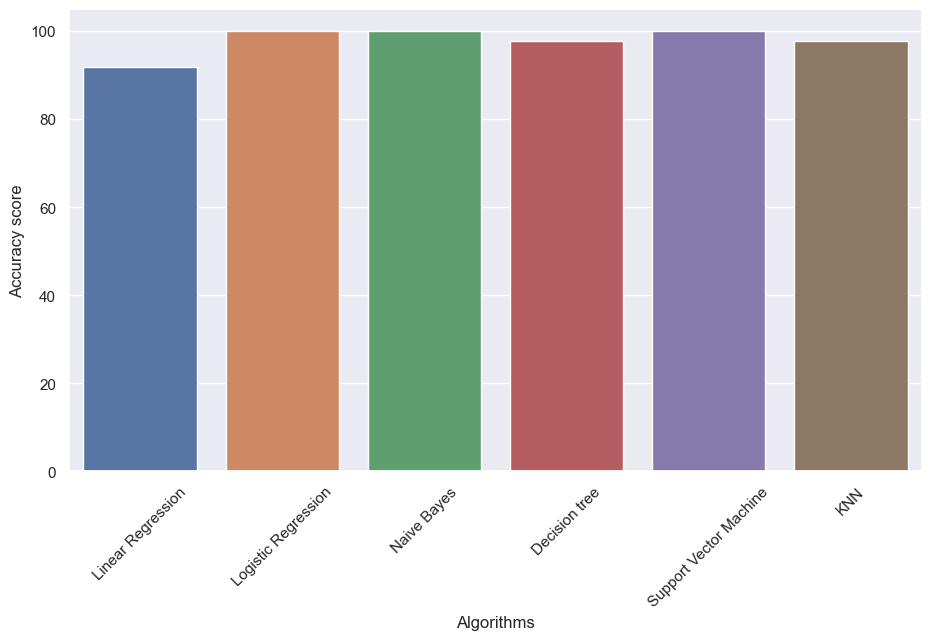

In [64]:
scores_plt = [sc_lr , sc_logr , score_nb, sc_dt, sc_svm, sc_knn]
algorithms = ["Linear Regression","Logistic Regression","Naive Bayes","Decision tree","Support Vector Machine", "KNN"]
sns.set(rc={'figure.figsize':(11,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms, y=scores_plt)
plt.xticks(rotation=45) 
plt.show()